<ipython-input-7-c3be388d4a5b>:42: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  bobs[i].set_data(x, y)  # Update bob (mass)


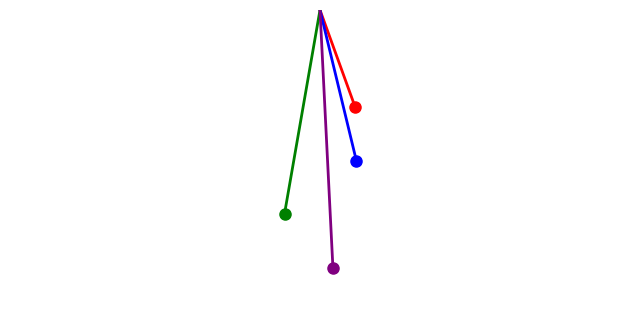

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Define constants
g = 9.81  # Acceleration due to gravity (m/s^2)
lengths = [1, 1.5, 2, 2.5]  # Lengths of the pendulum strings (in meters)
amplitudes = [np.radians(20), np.radians(15), np.radians(10), np.radians(5)]  # Initial angles (radians)
colors = ['red', 'blue', 'green', 'purple']  # Colors for different pendulums
time = np.linspace(0, 10, 1000)  # Time array for simulation (10 seconds)

# Calculate angular positions over time
positions = []
for i, L in enumerate(lengths):
    T = 2 * np.pi * np.sqrt(L / g)  # Period of each pendulum
    theta = amplitudes[i] * np.cos(2 * np.pi * time / T)  # Angular position as a function of time
    positions.append(theta)

# Setup figure and axes
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 0)
ax.set_aspect('equal')
ax.axis('off')  # No axes for a cleaner look

# Create pendulum components
lines = []
bobs = []
for color in colors:
    line, = ax.plot([], [], lw=2, color=color)
    bob, = ax.plot([], [], 'o', color=color, markersize=8)
    lines.append(line)
    bobs.append(bob)

# Animation update function
def update(frame):
    for i, L in enumerate(lengths):
        # X, Y position of pendulum bob
        x = L * np.sin(positions[i][frame])
        y = -L * np.cos(positions[i][frame])
        lines[i].set_data([0, x], [0, y])  # Update line (string)
        bobs[i].set_data(x, y)  # Update bob (mass)

# Create animation
ani = FuncAnimation(fig, update, frames=len(time), interval=20)

# Save the animation
ani.save("pendulum_oscillations_clean.mp4", writer="ffmpeg", fps=30)

# Show the animation
plt.show()
